In [1]:
packages <- c("ggplot2", "dplyr", "ggbreak", "lubridate", "grid", "fasttime", "pbkrtest", "ggpubr", "tidyr", "ggforce", "viridis", "gghalves")

In [2]:
install.packages(packages)

Installing packages into ‘/opt/homebrew/lib/R/4.2/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘grid’ is a base package, and should not be updated”


In [3]:
lapply(packages, library, character.only = TRUE)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


ggbreak v0.1.1

If you use ggbreak in published research, please cite the following
paper:

S Xu, M Chen, T Feng, L Zhan, L Zhou, G Yu. Use ggbreak to effectively
utilize plotting space to deal with large datasets and outliers.
Frontiers in Genetics. 2021, 12:774846. doi: 10.3389/fgene.2021.774846



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack


Loading required package: viridisLite



[[1]]
[1] "ggplot2"   "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[2]]
[1] "dplyr"     "ggplot2"   "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[3]]
 [1] "ggbreak"   "dplyr"     "ggplot2"   "stats"     "graphics"  "grDevices"
 [7] "utils"     "datasets"  "methods"   "base"     

[[4]]
 [1] "lubridate" "ggbreak"   "dplyr"     "ggplot2"   "stats"     "graphics" 
 [7] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[5]]
 [1] "grid"      "lubridate" "ggbreak"   "dplyr"     "ggplot2"   "stats"    
 [7] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[6]]
 [1] "fasttime"  "grid"      "lubridate" "ggbreak"   "dplyr"     "ggplot2"  
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[7]]
 [1] "pbkrtest"  "lme4"      "Matrix"    "fasttime"  "grid"      "lubridate"
 [7] "ggbreak"   "dplyr"     "ggplot2"   "stats"     "graphics"  "grDevices"
[13] "utils"     "datasets"  "methods"   "base"     

[[8]]
 [1] "ggpubr"    "pbkrtest"  "lme4"      "Matrix"    "fasttime"  "grid"     
 [7] "lubridate" "ggbreak"   "dplyr"     "ggplot2"   "stats"     "graphics" 
[13] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[9]]
 [1] "tidyr"     "ggpubr"    "pbkrtest"  "lme4"      "Matrix"    "fasttime" 
 [7] "grid"      "lubridate" "ggbreak"   "dplyr"     "ggplot2"   "stats"    
[13] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[10]]
 [1] "ggforce"   "tidyr"     "ggpubr"    "pbkrtest"  "lme4"      "Matrix"   
 [7] "fasttime"  "grid"      "lubridate" "ggbreak"   "dplyr"     "ggplot2"  
[13] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[19] "base"     

[[11]]
 [1] "viridis"     "viridisLite" "ggforce"     "tidyr"       "ggpubr"     
 [6] "pbkrtest"    "lme4"        "Matrix"      "fasttime"    "grid"       
[11] "lubridate"   "ggbreak"     "dplyr"       "ggplot2"     "stats"      
[16] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[21] "base"       

[[12]]
 [1] "gghalves"    "viridis"     "viridisLite" "ggforce"     "tidyr"      
 [6] "ggpubr"      "pbkrtest"    "lme4"        "Matrix"      "fasttime"   
[11] "grid"        "lubridate"   "ggbreak"     "dplyr"       "ggplot2"    
[16] "stats"       "graphics"    "grDevices"   "utils"       "datasets"   
[21] "methods"     "base"

In [100]:
# load traces
tdf <- read.csv("data/processed/traces.csv") %>% mutate(transaction_duration = transaction_duration / 1000 / 1000)

In [101]:
# load experiments
edf <- read.csv("data/processed/experiments.csv", row.names = 1, header= TRUE) %>% filter(config != "")

## Experiment 1

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 14 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 14 rows containing non-finite values (`stat_boxplot()`).”


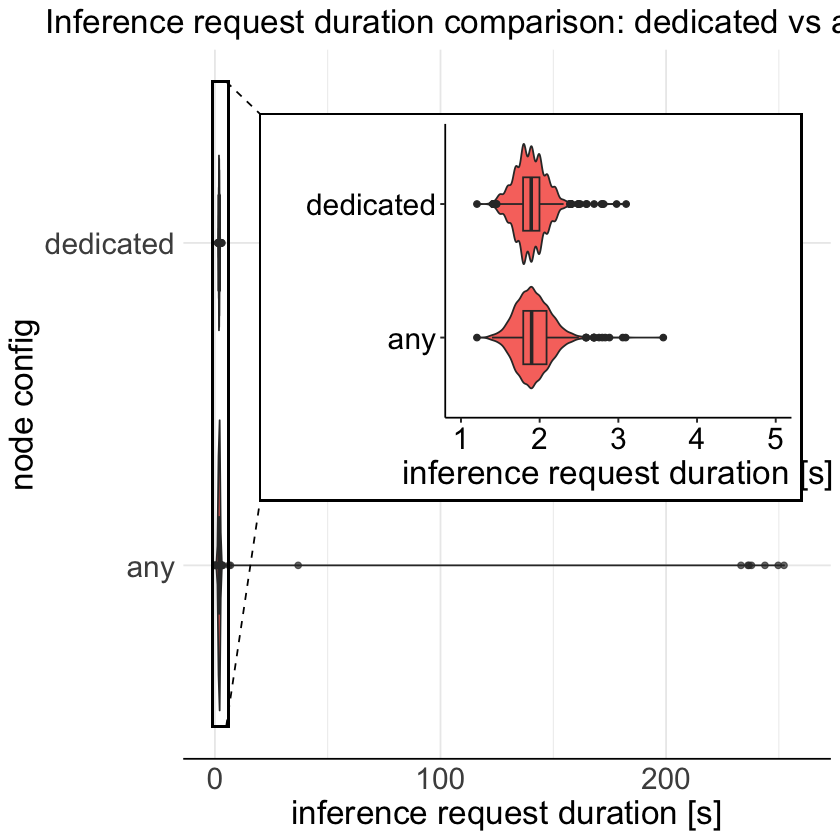

In [102]:
plotdf <- tdf %>% filter(grepl('experiment-cpu1-scale1', service_name))

p1 <- plotdf %>%
    ggplot(aes(x=transaction_duration, y=service_name, fill="")) +
        geom_violin() +
        geom_boxplot(width=0.3, alpha=0.7) +
        geom_rect(aes(xmin = -1, xmax = 6, ymin = 0.5, ymax = 2.5), alpha=0, color="black") +
        xlab("inference request duration [s]") +
        ylab("node config") +
        scale_y_discrete(labels=c("any", "dedicated")) +
        ggtitle("Inference request duration comparison: dedicated vs any node") +
        theme_minimal() +
        theme(
            legend.position = "none",
            axis.text = element_text(size = 18),
            axis.title = element_text(size = 20),
            axis.line.x = element_line(color="black"),
            plot.title = element_text(size = 20, hjust=0.5)
        )

p2 <- plotdf %>%
    ggplot(aes(x=transaction_duration, y=service_name, fill="")) +
        geom_violin() +
        geom_boxplot(width=0.4) +
        xlim(c(1, 5)) +
        scale_y_discrete(labels=c("", "")) +
        xlab("inference request duration [s]") +
        ylab("") +
        scale_y_discrete(labels=c("any", "dedicated")) +
        theme_pubr() +
        theme(
            legend.position = "none",
            panel.grid = element_blank(),
            panel.border = element_blank(),
            axis.text = element_text(size = 18),
            axis.title = element_text(size = 20),
            axis.line.x = element_line(color="black"),
            plot.title = element_text(size = 20, hjust=0.5)
        )

x1 <- 20
x2 <- 260
y1 <- 1.2
y2 <- 2.4

p1 +
    annotation_custom(ggplotGrob(p2), xmin = x1, xmax = x2, ymin = y1, ymax = y2) +
    geom_line(
        aes(x,y,group=grp), 
        data=data.frame(x = c(5, x1, 5, x1), y=c(0.5, y1, 2.5, y2),grp=c(1,1,2,2)),
        linetype='dashed'
    ) +
    geom_rect(aes(xmin = x1, xmax = x2, ymin = y1, ymax = y2), color='black', alpha=0)

ggsave("output/1-dedicated-any-duration-comparison.pdf", width=10, height=6)

#### Percentile difference 

In [113]:
d1 <- tdf %>% filter(service_name == "inference-experiment-cpu1-scale1-ml")
d2 <- tdf %>% filter(service_name == "inference-experiment-cpu1-scale1-any") %>%
    filter(timestamp > "2023-05-24 08")

quantile(d1$transaction_duration, c(0.85, 0.9, 0.95, 0.99))
quantile(d2$transaction_duration, c(0.85, 0.9, 0.95, 0.99))

1 - (2.533631 / 242.80602262)
1 - (2.20025025 / 3.06148175)

85%      90%      95%      99% 
2.094387 2.107059 2.200250 2.533631

85%        90%        95%        99% 
  2.193214   2.229309   3.061482 242.806023

[1] 0.9895652

[1] 0.281312

## Experiment 2

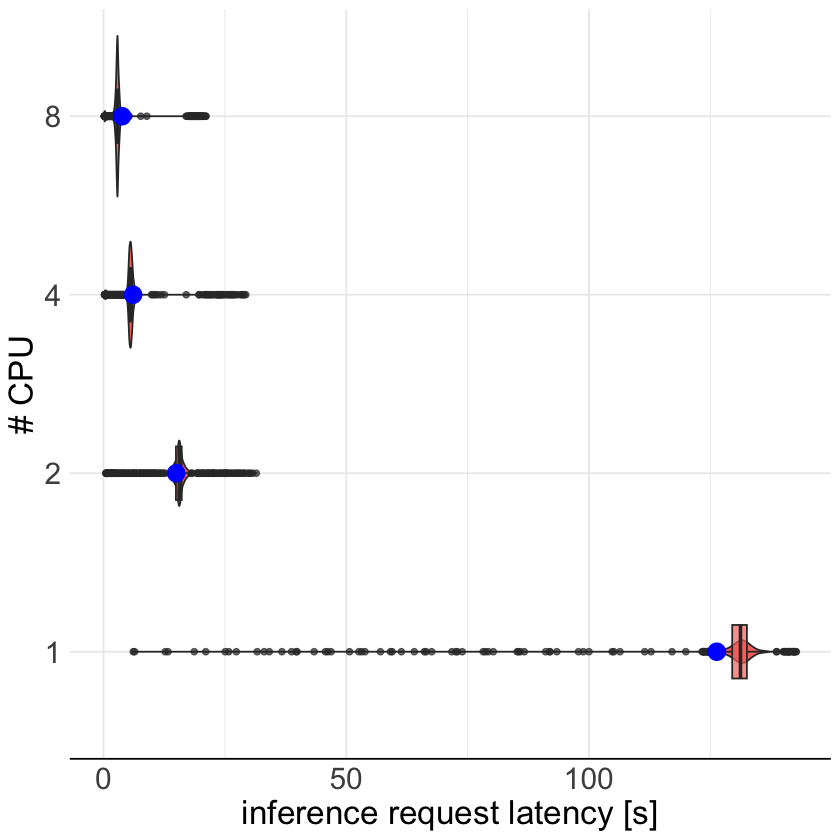

In [74]:
configs <- c("cpu1-scale1-ml", "cpu2-scale1-ml", "cpu4-scale1-ml", "cpu8-scale1-ml")
edf %>%
    filter(config %in% configs) %>%
    mutate_at(c("duration"), as.numeric) %>%
    ggplot(aes(x=duration, y=config, fill="")) +
        geom_violin() +
        geom_boxplot(width=0.3, alpha=0.7) +
        stat_summary(fun.y=mean, geom="point", shape=20, size=7, color="blue", fill="blue") +
        xlab("inference request latency [s]") +
        ylab("# CPU") +
        scale_y_discrete(labels=c("1", "2", "4", "8")) +
        theme_minimal() +
        theme(
            legend.position = "none",
            axis.text = element_text(size = 18),
            axis.title = element_text(size = 20),
            axis.line.x = element_line(color="black"),
            plot.title = element_text(size = 20, hjust=0.5)
        )

Warning message:
“`position_dodge()` requires non-overlapping x intervals”


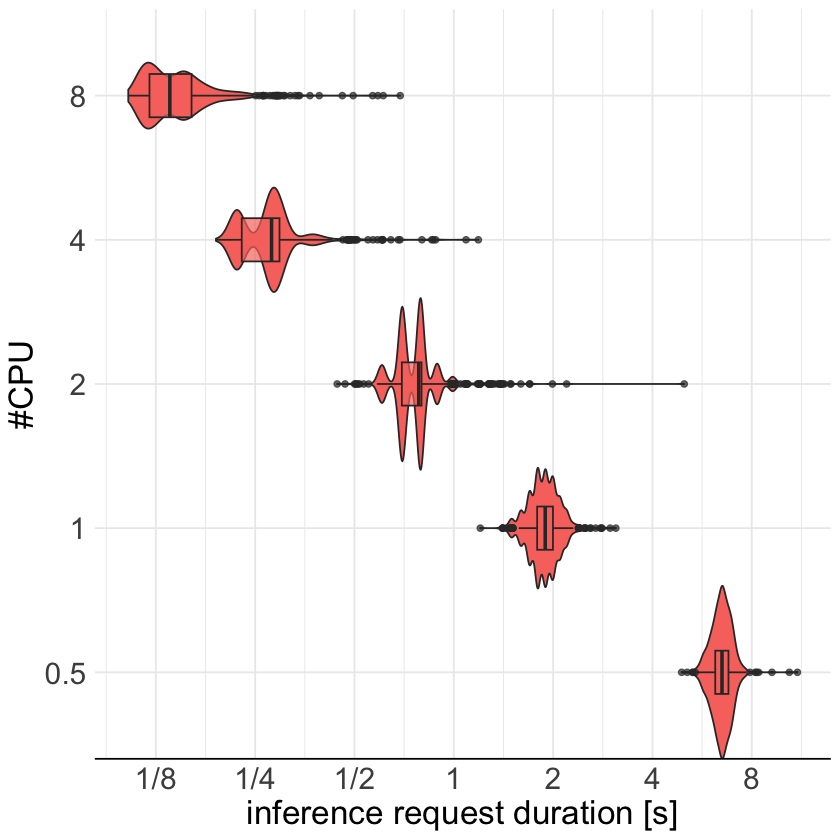

In [96]:
configs <- c("inference-experiment-cpu05-scale1-ml", "inference-experiment-cpu1-scale1-ml", "inference-experiment-cpu2-scale1-ml", "inference-experiment-cpu4-scale1-ml", "inference-experiment-cpu8-scale1-ml")
p1 <- tdf %>%
    filter(service_name %in% configs) %>%
    ggplot(aes(x=transaction_duration, y=service_name, fill="")) +
        geom_violin(width=1.2) +
        geom_boxplot(width=0.3, alpha=0.7) +
        xlab("inference request duration [s]") +
        scale_x_continuous(breaks=c(0, 0.125, 0.25, 0.5, 1, 2, 4, 8), trans="log2", labels=c(0, "1/8", "1/4", "1/2", 1, 2, 4, 8)) +
        ylab("#CPU") +
        scale_y_discrete(labels=c("0.5", "1", "2", "4", "8")) +
        theme_minimal() +
        theme(
            legend.position = "none",
            axis.text = element_text(size = 18),
            axis.title = element_text(size = 20),
            axis.line.x = element_line(color="black"),
            plot.title = element_text(size = 20, hjust=0.5)
        )

p1

In [77]:
tdf %>%
    filter(service_name %in% configs) %>%
    group_by(service_name) %>%
    summarise(m = mean(transaction_duration))

service_name,m
<chr>,<dbl>
inference-experiment-cpu05-scale1-ml,6.5065708
inference-experiment-cpu1-scale1-ml,1.8912155
inference-experiment-cpu2-scale1-ml,0.7779508
inference-experiment-cpu4-scale1-ml,0.2825540
inference-experiment-cpu8-scale1-ml,0.1482196


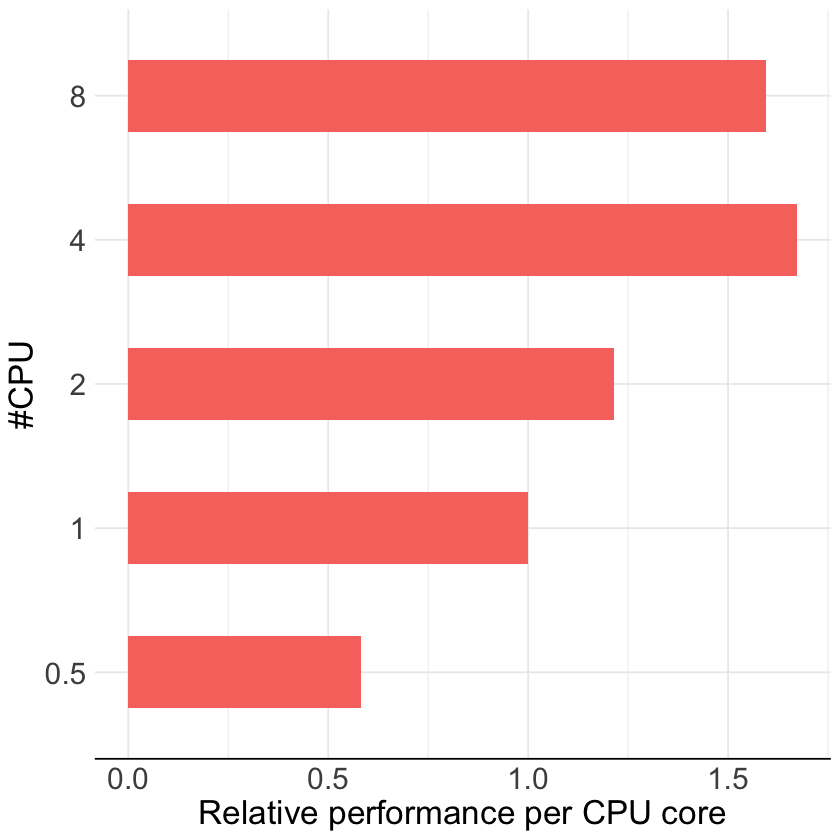

In [78]:
tmp <- tdf %>%
    filter(service_name %in% configs) %>%
    group_by(service_name) %>%
    summarise(m = mean(transaction_duration))

values <- tmp$m
values <- c(values[1] * 0.5, values[2], values[3]*2, values[4]*4, values[5]*8)
values <- values[2] / values
cores <- c("0.5", "1", "2", "4", "8")
p2 <- data.frame(values, cores) %>%
    ggplot(aes(x=values, y=cores, fill="")) +
        geom_col(width=0.5) +
        xlab("Relative performance per CPU core") +
        ylab("#CPU") +
        theme_minimal() +
        theme(
            legend.position = "none",
            axis.text = element_text(size = 18),
            axis.title = element_text(size = 20),
            axis.line.x = element_line(color="black"),
            plot.title = element_text(size = 20, hjust=0.5)
        )

p2

Warning message:
“`position_dodge()` requires non-overlapping x intervals”


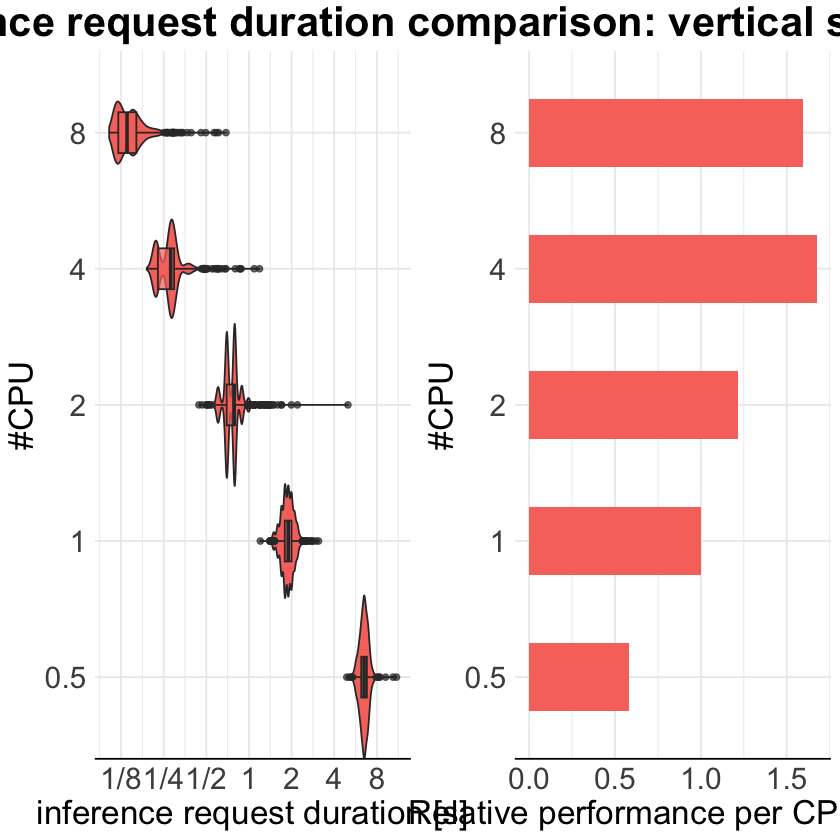

In [97]:
p <- ggarrange(p1, p2, nrow=1, ncol=2) %>%
    annotate_figure(top = text_grob("Inference request duration comparison: vertical scaling", face = "bold", size = 25))

p
ggsave("output/2-cpu-scaling-comparison.pdf", width=12, height=5)

## Experiment 3

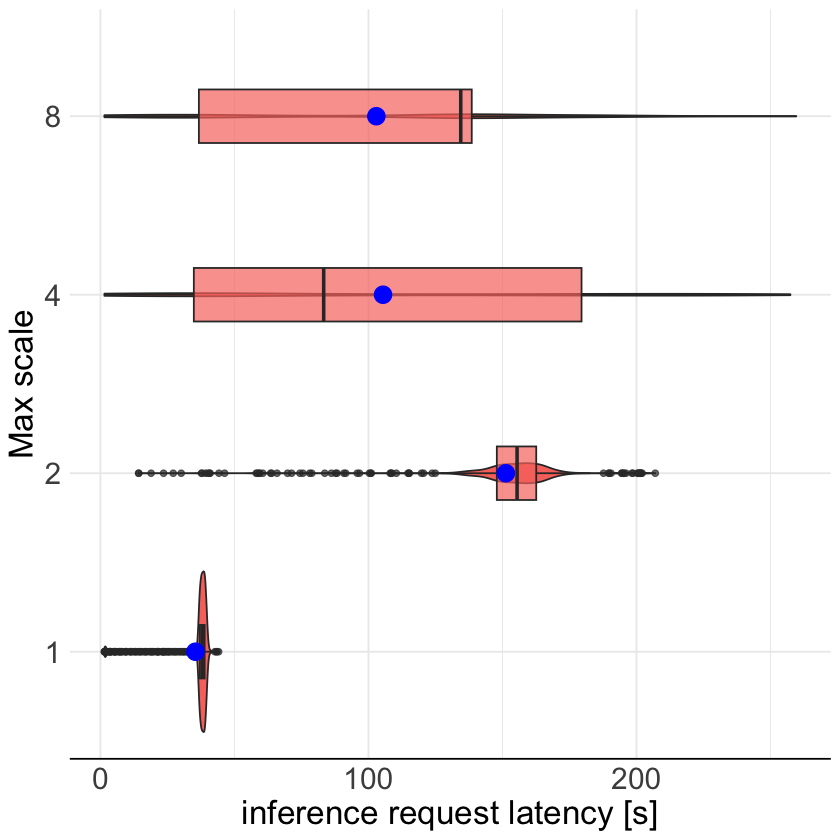

In [115]:
configs <- c("cpu1-scale1-ml", "cpu1-scale2-ml", "cpu1-scale4-ml", "cpu1-scale8-ml")

p1 <- edf %>%
    filter(config %in% configs) %>%
    mutate_at(c("duration"), as.numeric) %>%
    ggplot(aes(x=duration, y=config, fill="")) +
        geom_violin() +
        geom_boxplot(width=0.3, alpha=0.7) +
        stat_summary(fun.y=mean, geom="point", shape=20, size=7, color="blue", fill="blue") +
        xlab("inference request latency [s]") +
        ylab("Max scale") +
        scale_y_discrete(labels=c("1", "2", "4", "8")) +
        theme_minimal() +
        theme(
            legend.position = "none",
            axis.text = element_text(size = 18),
            axis.title = element_text(size = 20),
            axis.line.x = element_line(color="black"),
            plot.title = element_text(size = 20, hjust=0.5)
        )

p1

In [116]:
configs <- c("inference-experiment-cpu1-scale1-ml", "inference-experiment-cpu1-scale2-ml", "inference-experiment-cpu1-scale4-ml", "inference-experiment-cpu1-scale8-ml")

p2 <- tdf %>%
    filter(service_name %in% configs) %>%
    ggplot(aes(x=transaction_duration, y=service_name, fill="")) +
        geom_violin() +
        geom_boxplot(width=0.3, alpha=0.7) +
        stat_summary(fun.y=mean, geom="point", shape=20, size=7, color="blue", fill="blue") +
        xlab("inference request duration [s]") +
        ylab("Max scale") +
        scale_y_discrete(labels=c("1", "2", "4", "8")) +
        theme_minimal() +
        theme(
            legend.position = "none",
            axis.text = element_text(size = 18),
            axis.title = element_text(size = 20),
            axis.line.x = element_line(color="black"),
            plot.title = element_text(size = 20, hjust=0.5)
        )

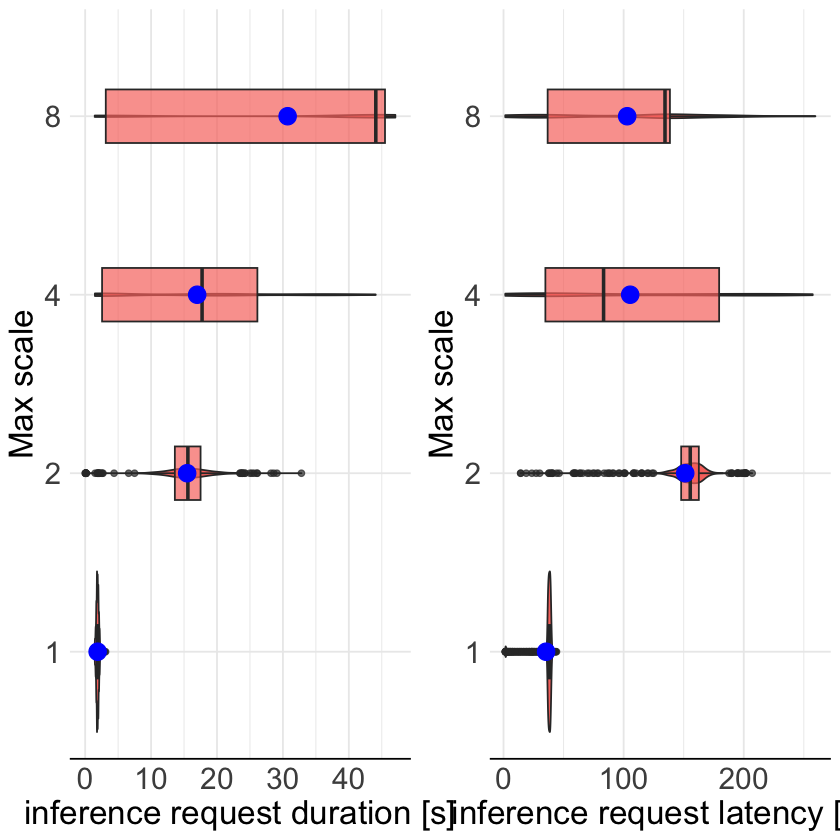

In [118]:
ggarrange(p2, p1, nrow=1, ncol=2)
ggsave("output/3-horizontal-scale-comparison.pdf", width=10, height=5)

In [128]:
35.45 / 102.94
(102.94 - 35.45) / 35.45

[1] 0.3443754

[1] 1.903808